In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from astropy.table import Table
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from halotools.empirical_models import Zheng07

igraph package not installed.  Some functions will not be available.


In [3]:
def richness(group_id): 
    gals = Table() 
    gals['groupid'] = group_id
    gals['dummy'] = 1
    grouped_table = gals.group_by('groupid')
    grp_richness = grouped_table['dummy'].groups.aggregate(np.sum)
    return grp_richness

In [4]:
hod_model = Zheng07(threshold = -21.0)

{'logM0': 11.0, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.0}
294
Group Richness computation takes  8.95170903206  seconds
{'logM0': 11.0, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.5}
102
Group Richness computation takes  1.49701285362  seconds
{'logM0': 11.0, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 14.0}
42
Group Richness computation takes  1.0258910656  seconds
{'logM0': 11.75, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.0}
265
Group Richness computation takes  8.11050486565  seconds
{'logM0': 11.75, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.5}
89
Group Richness computation takes  1.37603712082  seconds
{'logM0': 11.75, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 14.0}
31
Group Richness computation takes  1.01651597023  seconds
{'logM0': 12.5, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.0}
262
Group Richness computation takes  7.4762930

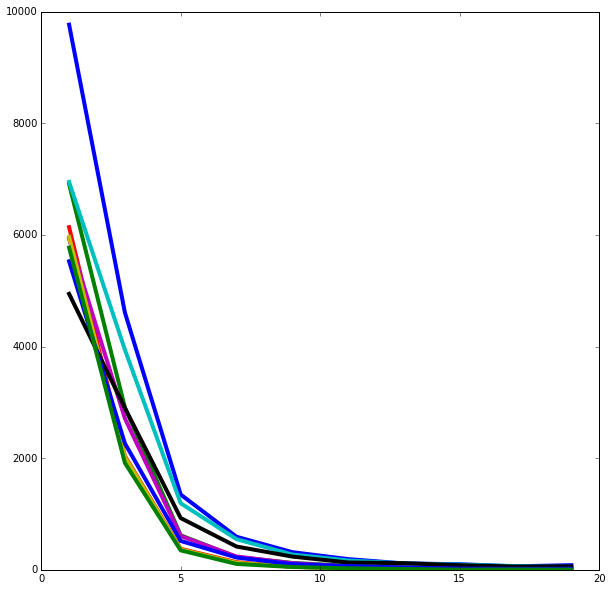

In [15]:
# Group Richness histogram as a function of various parameters

fig = plt.figure(figsize=(10,10))
sub = fig.add_subplot(111)

for m0 in np.linspace(11.0, 12.5, 3): 
    for m1 in np.linspace(13.0, 14.0, 3): 
        hod_model.param_dict['logM1'] = m1
        hod_model.param_dict['logM0'] = m0
        print hod_model.param_dict
        
        hod_time = time.time()
        hod_model.populate_mock()

        group_id = hod_model.mock.compute_fof_group_ids()
        group_richness = richness(group_id)
        print np.max(group_richness)
        
        print 'Group Richness computation takes ', time.time() - hod_time, ' seconds'
        hist, bin_edge = np.histogram(group_richness, bins=10, range=[0.0, 20])

        bin_mid = 0.5 * (bin_edge[1:] + bin_edge[:-1])
        sub.plot(bin_mid, hist, lw=4)
        #seabreeze.distplot(grp_richness, axlabel='Richness')

plt.show()    

{'logM0': 12.5, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 14.0}
[5990 1853  450  101    7    1    0    0    0    0]
[5872 1836  484   89   15    0    0    0    0    0]
[5774 1878  460   93   10    1    0    0    0    0]
[5979 1843  469   99   11    0    0    0    0    0]
[5874 1929  432   95   13    1    0    0    0    0]
[5852 1855  474   93   12    0    0    0    0    0]
[5903 1860  467   85   10    0    0    0    0    0]
[5942 1838  486   97    9    1    0    0    0    0]
[5933 1825  485  102   13    0    0    0    0    0]
[5720 1901  484   86   13    0    0    0    0    0]
[    0.     2.     4.     8.    16.    32.    63.   126.   251.   501.
  1000.]


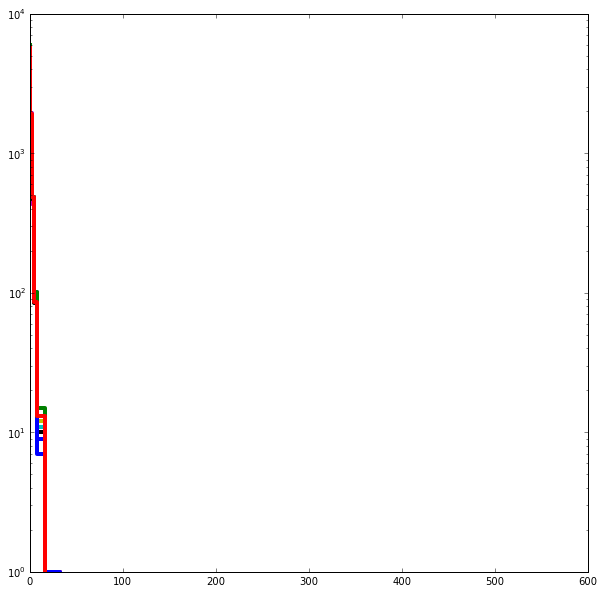

In [51]:
# Group Richness histogram as a function of various parameters
print hod_model.param_dict

fig = plt.figure(figsize=(10,10))
sub = fig.add_subplot(111)


histograms, bins = [], [] 
n_mocks = 10
n_bins = 10
hist_bins = np.rint(np.logspace(0.0, 3.0, n_bins+1 ))
hist_bins[0] = 0.0

histograms = np.zeros((n_mocks, n_bins))
for i in xrange(n_mocks): 
    hod_time = time.time()
    hod_model.populate_mock()

    group_id = hod_model.mock.compute_fof_group_ids()
    group_richness = richness(group_id)

    #print 'Group Richness computation takes ', time.time() - hod_time, ' seconds'
    hist, bin_edge = np.histogram(group_richness, bins=hist_bins)

    #bin_mid = 0.5 * (bin_edge[1:] + bin_edge[:-1])
    print hist
    histograms[i,:] = hist
    sub.step(bin_edge[:-1], hist, lw=4)
    #sub.plot(bin_mid, hist, lw=4)
print bin_edge
mu_hist = np.sum(histograms, axis=0) / np.float(n_mocks)
sub.set_yscale("log")
#sub.set_xscale("log")
plt.show()

[[  7.40565556e+03  -1.58802222e+03  -1.91322222e+02   3.46222222e+02
   -8.65222222e+01   4.93333333e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.58802222e+03   1.04240000e+03  -3.65311111e+02  -7.02222222e+01
    1.08444444e+01   5.64444444e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.91322222e+02  -3.65311111e+02   3.14988889e+02  -1.82222222e+01
    1.17444444e+01  -5.37777778e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  3.46222222e+02  -7.02222222e+01  -1.82222222e+01   3.55555556e+01
   -4.77777778e+00   1.11111111e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -8.65222222e+01   1.08444444e+01   1.17444444e+01  -4.77777778e+00
    5.56666667e+00  -6.88888889e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.93333333e+00   5.64444444e+00  -5.37777778e+00   1.11111111e+00
   -6.88888889e-01   2.66666667e-01   0.00000

<matplotlib.colorbar.Colorbar instance at 0x11961f440>

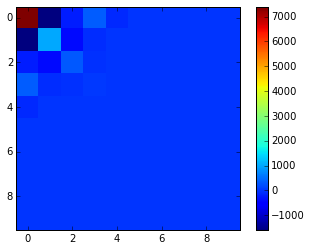

In [52]:
cij = np.zeros((n_bins, n_bins))
cij = 1./(np.float(n_mocks)-1.) * np.sum(
    ((histograms - mu_hist)[:, :, None]) * ((histograms - mu_hist)[:, None, :]), 
axis=0)
print cij
plt.imshow(cij, interpolation='nearest')
plt.colorbar()

In [50]:
plt.imshow(np.linalg.inv(cij), interpolation = 'nearest')
plt.colorbar()

LinAlgError: Singular matrix